# Exploring business problem

BigMart, a supermarket with multiple store branches, aims to forecast the sales of any product at any branch in order to achieve financial benefits such as optimal inventory management, efficient resource allocation, effective marketing and promotions, and many other financial benifits.

# Problem statement

The main objective of this project is to develop a predictive model that can estimate the sales of each product at a specific store. Given the dataset containing various attributes of the products and stores, we will leverage machine learning techniques to build a model that can accurately predict the sales of BigMart products.

# The Dataset 



In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
list(train.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
train.shape

(8523, 12)

### dataset description
so the dataset provided consists of the following 12 attributes:

- `Item_Identifier`: A unique identifier for each product. (Categorical)
- `Item_Weight`: The weight of the product.
- `Item_Fat_Content`: Indicates the fat content of the product. (Categorical)
- `Item_Visibility`: The percentage of total display area in the store allocated to the particular product.
- `Item_Type`: The category to which the product belongs. (Categorical)
- `Item_MRP`: The maximum retail price (MRP) of the product.
- `Outlet_Identifier`: A unique identifier for each store. (Categorical)
- `Outlet_Establishment_Year`: The year in which the store was established.
- `Outlet_Size`: The size of the store. (Categorical)
- `Outlet_Location_Type`: The type of city where the store is located. (Categorical)
- `Outlet_Type`: The type of outlet (grocery store, supermarket, etc.). (Categorical)
- `Item_Outlet_Sales`: The sales of the product in the store, and it is the target variable.

the dataset provides 8523 product samples


# Exploratory data analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### missing values imputation

In [7]:
from sklearn.impute import SimpleImputer

train_imputed = train.copy()

mean_imputer = SimpleImputer(strategy='mean')
train_imputed['Item_Weight'] = mean_imputer.fit_transform(train_imputed['Item_Weight'].values.reshape(-1, 1)).ravel()

frequency_imputer = SimpleImputer(strategy='most_frequent')
train_imputed['Outlet_Size'] = frequency_imputer.fit_transform(train_imputed['Outlet_Size'].values.reshape(-1, 1)).ravel()

train_imputed


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
train_imputed.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outliers 

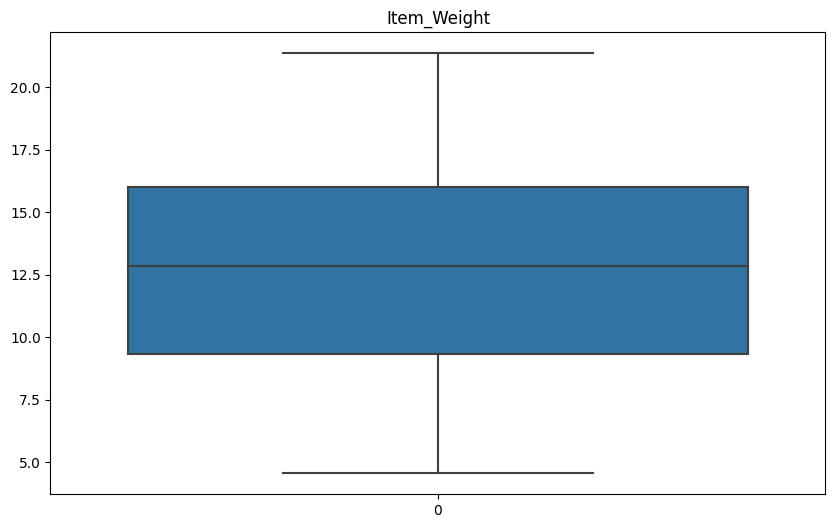

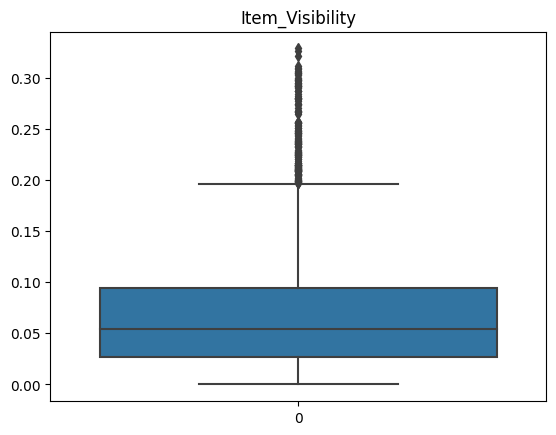

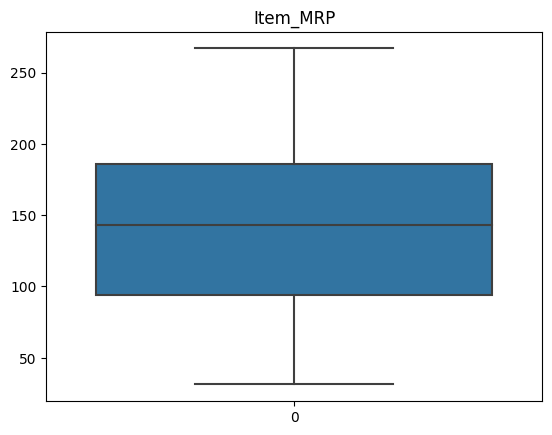

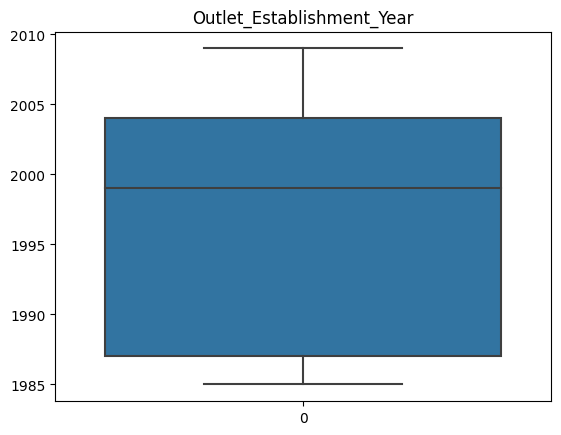

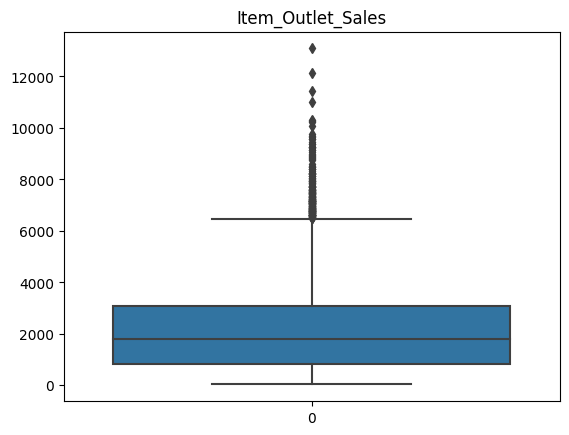

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) 

numerical_features = [feature for feature in train_imputed.columns if train_imputed[feature].dtype != 'object']
for feature in numerical_features:
    
    sns.boxplot(train_imputed[feature])
    plt.title(feature)
    plt.show()



## Graphs

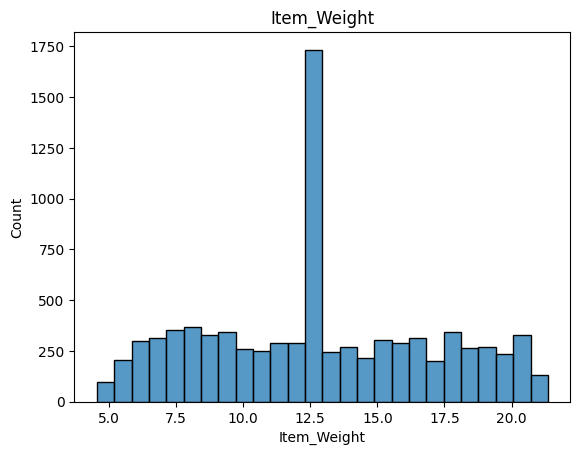

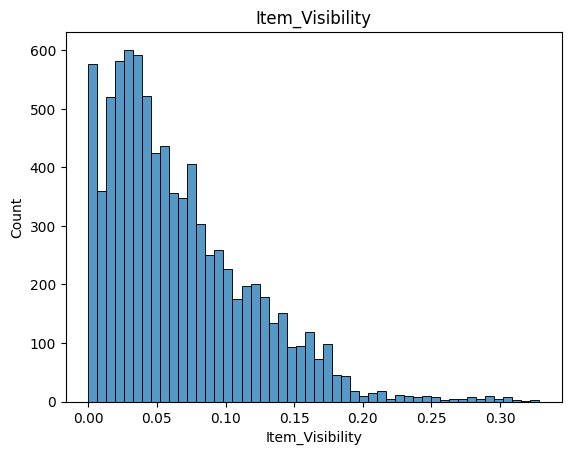

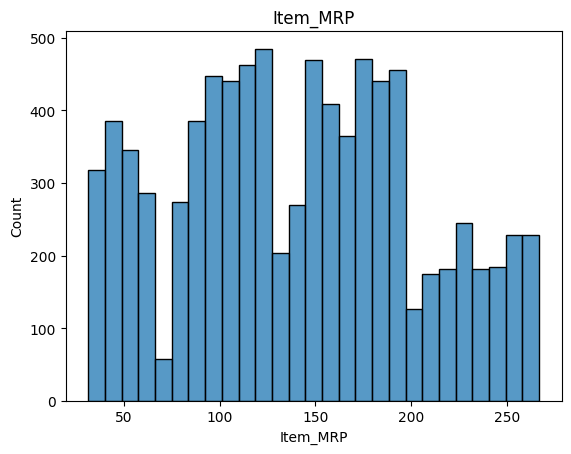

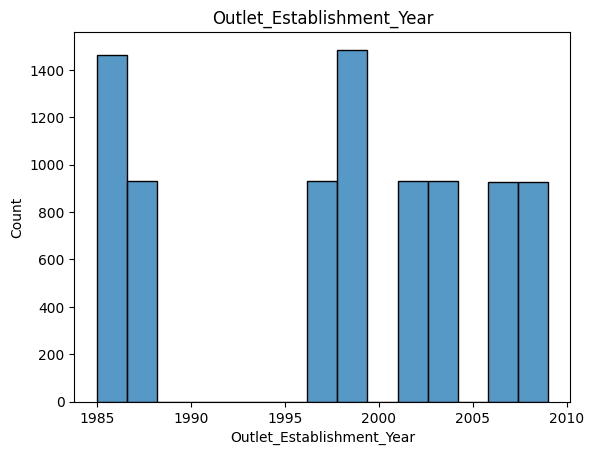

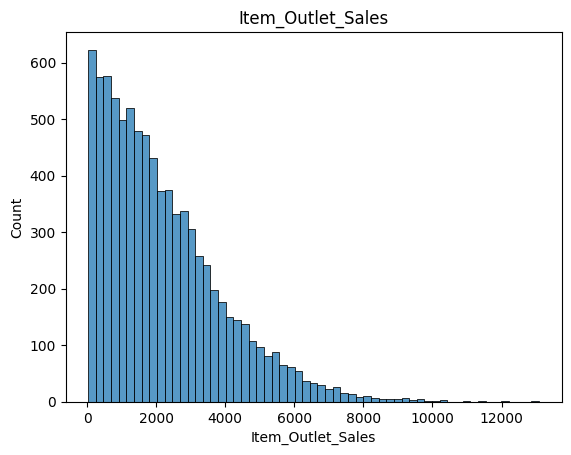

In [10]:
for feature in numerical_features:
    
    sns.histplot(train_imputed[feature])
    plt.title(feature)
    plt.show()

In [11]:
categorical_features = [feature for feature in train_imputed.columns if train_imputed[feature].dtype == 'object']
for feature in categorical_features:
    print(train[feature].value_counts())


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dt

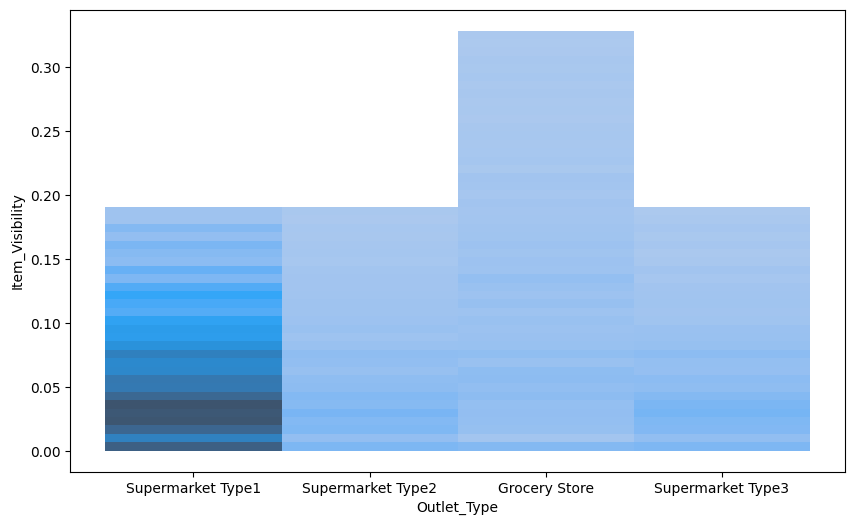

In [12]:
plt.figure(figsize=(10, 6)) 
sns.histplot(x=train_imputed['Outlet_Type'],y=train_imputed['Item_Visibility'])
plt.show()



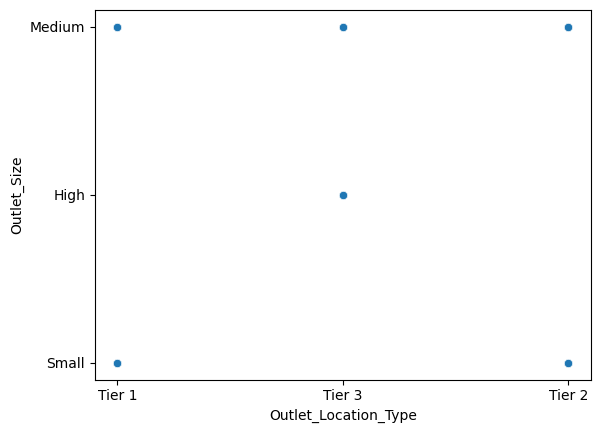

In [13]:
sns.scatterplot(x=train_imputed['Outlet_Location_Type'],y=train_imputed['Outlet_Size'])
plt.show()


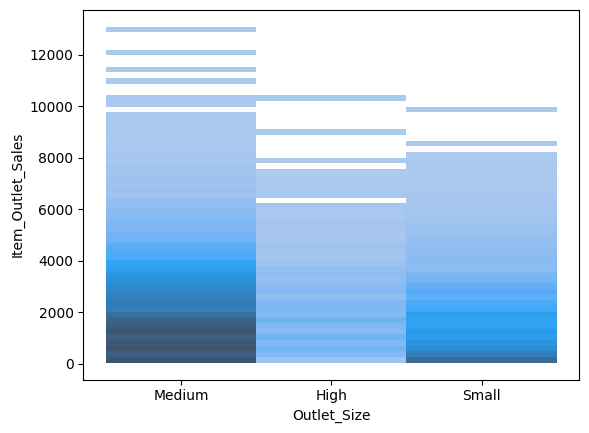

In [14]:
sns.histplot(x=train_imputed['Outlet_Size'],y=train_imputed['Item_Outlet_Sales'])
plt.show()


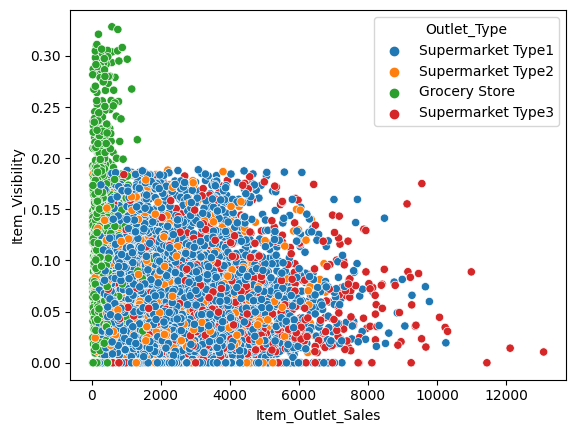

In [15]:
sns.scatterplot(x=train_imputed['Item_Outlet_Sales'],y=train_imputed['Item_Visibility'],hue=train_imputed['Outlet_Type'])
plt.show()



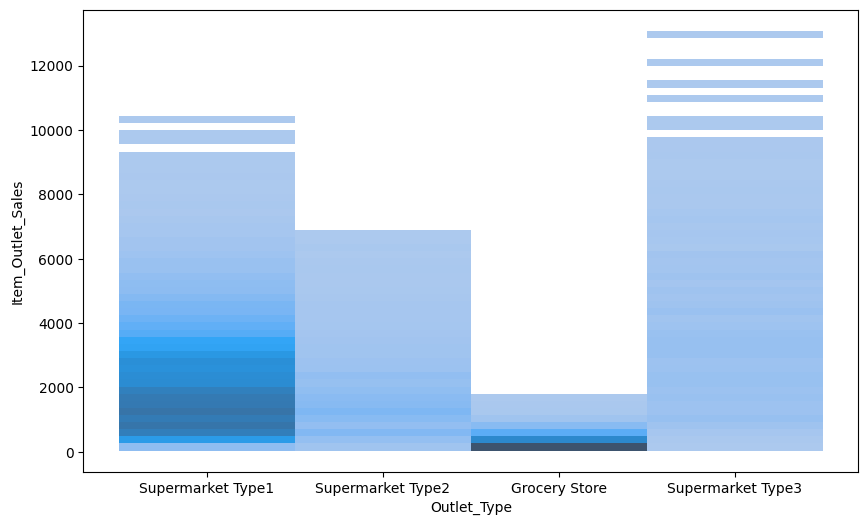

In [16]:
plt.figure(figsize=(10, 6)) 
sns.histplot(x=train_imputed['Outlet_Type'],y=train_imputed['Item_Outlet_Sales'])
plt.show()



# Converting categorical values to numerical values

### one-hot encoding nominal values 

In [17]:
features_to_onehot_encode = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier','Outlet_Type']

print(train_imputed['Item_Identifier'].unique())
print(train_imputed['Item_Type'].unique())
print(train_imputed['Outlet_Identifier'].unique())
print(train_imputed['Outlet_Type'].unique())


['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [25]:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(train_imputed[features_to_onehot_encode])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_onehot_encode))

train_imputed_onehot_encoded = pd.concat([train_imputed.drop(features_to_onehot_encode, axis=1), encoded_df], axis=1)
train_imputed_onehot_encoded

C:\Users\G.Owais\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5.920,Regular,0.019278,48.2692,2009,Medium,Tier 3,443.4228,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,19.200,Regular,0.000000,182.0950,1998,Medium,Tier 3,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.930,Low Fat,0.000000,53.8614,1987,High,Tier 3,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,1987,High,Tier 3,2778.3834,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,Regular,0.046982,108.1570,2002,Medium,Tier 2,549.2850,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,Low Fat,0.035186,85.1224,2004,Small,Tier 2,1193.1136,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,Regular,0.145221,103.1332,2009,Medium,Tier 3,1845.5976,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### label encoding ordinal values

In [27]:
# ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type']

print(train_imputed_onehot_encoded['Item_Fat_Content'].unique())
print(train_imputed_onehot_encoded['Outlet_Size'].unique())
print(train_imputed_onehot_encoded['Outlet_Location_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']


### ensuring consistency 

In [28]:
train_imputed_onehot_encoded['Item_Fat_Content'] = train_imputed_onehot_encoded['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})


In [29]:
print(train_imputed_onehot_encoded['Item_Fat_Content'].unique())
print(train_imputed_onehot_encoded['Outlet_Size'].unique())
print(train_imputed_onehot_encoded['Outlet_Location_Type'].unique())

['Low Fat' 'Regular']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']


In [30]:


columns_to_label_encode = {
    'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
    'Outlet_Size': {'Small':0 , 'Medium':0.5, 'High':1},
    'Outlet_Location_Type':{'Tier 1':0, 'Tier 2':0.5, 'Tier 3':1}
}
train_imputed_encoded = train_imputed_onehot_encoded.copy()
# Label encode the specified columns
for column, mapping in columns_to_label_encode.items():
    train_imputed_encoded[column] = train_imputed_encoded[column].replace(mapping)

train_imputed_encoded

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,0.5,0.0,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5.920,1,0.019278,48.2692,2009,0.5,1.0,443.4228,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,0,0.016760,141.6180,1999,0.5,0.0,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,19.200,1,0.000000,182.0950,1998,0.5,1.0,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0,0.000000,53.8614,1987,1.0,1.0,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,1.0,1.0,2778.3834,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,1,0.046982,108.1570,2002,0.5,0.5,549.2850,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0,0.035186,85.1224,2004,0.0,0.5,1193.1136,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,1,0.145221,103.1332,2009,0.5,1.0,1845.5976,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
train_imputed_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1597 entries, Item_Weight to Outlet_Type_Supermarket Type3
dtypes: float64(1595), int64(2)
memory usage: 103.8 MB


### removing outliers

In [32]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

columns_to_scale = scaler.fit_transform(train_imputed_encoded[['Item_Outlet_Sales', 'Item_Visibility']])

z_scores = np.abs(columns_to_scale)

z_score_threshold = 2.5

outliers = np.where(z_scores > z_score_threshold)

samples_with_outliers = set(outliers[0])

train_imputed_encoded_no_outliers = train_imputed_encoded.drop(samples_with_outliers)

print("Original data shape:", train_imputed_encoded.shape)
print("Data shape after removing outliers:", train_imputed_encoded_no_outliers.shape)


Original data shape: (8523, 1597)
Data shape after removing outliers: (8180, 1597)


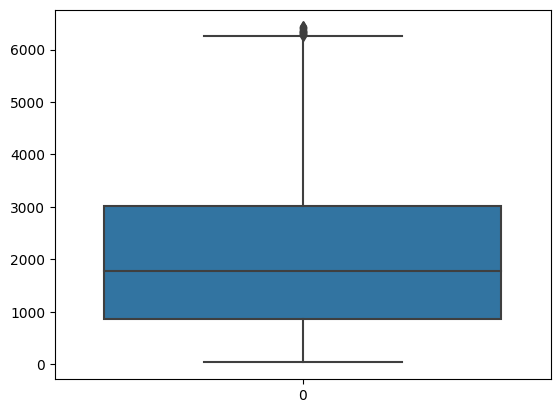

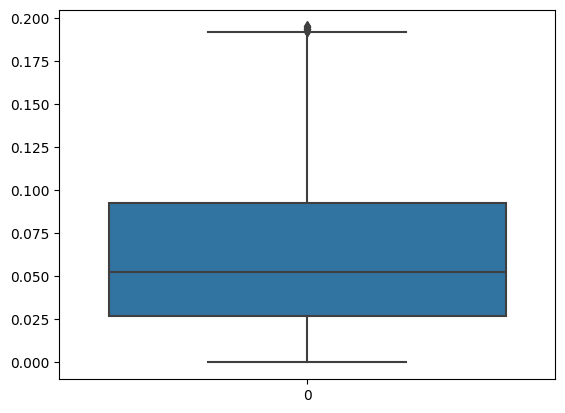

In [33]:
sns.boxplot(train_imputed_encoded_no_outliers['Item_Outlet_Sales'])
plt.show()
sns.boxplot(train_imputed_encoded_no_outliers['Item_Visibility'])
plt.show()

In [34]:
train_imputed_encoded_no_outliers

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,0.5,0.0,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5.920,1,0.019278,48.2692,2009,0.5,1.0,443.4228,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,0,0.016760,141.6180,1999,0.5,0.0,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,19.200,1,0.000000,182.0950,1998,0.5,1.0,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0,0.000000,53.8614,1987,1.0,1.0,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,1.0,1.0,2778.3834,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,1,0.046982,108.1570,2002,0.5,0.5,549.2850,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0,0.035186,85.1224,2004,0.0,0.5,1193.1136,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,1,0.145221,103.1332,2009,0.5,1.0,1845.5976,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_imputed_encoded_no_outliers = train_imputed_encoded_no_outliers.drop('Item_Outlet_Sales',axis=1)
y = train_imputed_encoded_no_outliers['Item_Outlet_Sales']

In [36]:
X_imputed_encoded_no_outliers

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5.920,1,0.019278,48.2692,2009,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,0,0.016760,141.6180,1999,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,19.200,1,0.000000,182.0950,1998,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0,0.000000,53.8614,1987,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,1,0.046982,108.1570,2002,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0,0.035186,85.1224,2004,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,1,0.145221,103.1332,2009,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8180, dtype: float64

# Robust Scaling

In [38]:

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

X = pd.DataFrame(robust_scaler.fit_transform(X_imputed_encoded_no_outliers),columns=X_imputed_encoded_no_outliers.columns)

X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.523183,0.0,-0.556167,1.201693,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.020242,1.0,-0.507188,-1.023066,0.588235,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
2,0.682699,0.0,-0.545362,0.007393,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.932699,1.0,-0.799437,0.454210,-0.058824,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
4,-0.577595,0.0,-0.799437,-0.961334,-0.705882,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8175,-0.881271,0.0,0.061372,0.812163,-0.705882,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8176,-0.658477,1.0,-0.087205,-0.361976,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8177,-0.332007,0.0,-0.266030,-0.616251,0.294118,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8178,-0.830536,1.0,1.402039,-0.417433,0.588235,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0


## Applying same preprocessing steps to test data

In [39]:
test = pd.read_csv('Test.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [41]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
test_imputed = test.copy()

test_imputed['Item_Weight'] = mean_imputer.fit_transform(test_imputed['Item_Weight'].values.reshape(-1, 1)).ravel()

test_imputed['Outlet_Size'] = frequency_imputer.fit_transform(test_imputed['Outlet_Size'].values.reshape(-1, 1)).ravel()


test_imputed

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [43]:
test_imputed.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [45]:

encoded_data = encoder.transform(test_imputed[features_to_onehot_encode])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_onehot_encode))

test_imputed_onehot_encoded = pd.concat([test_imputed.drop(features_to_onehot_encode, axis=1), encoded_df], axis=1)
test_imputed_onehot_encoded


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,Low Fat,0.007565,107.8622,1999,Medium,Tier 1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8.300000,reg,0.038428,87.3198,2007,Medium,Tier 2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.600000,Low Fat,0.099575,241.7538,1998,Medium,Tier 3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7.315000,Low Fat,0.015388,155.0340,2007,Medium,Tier 2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.695633,Regular,0.118599,234.2300,1985,Medium,Tier 3,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,141.3154,1997,Small,Tier 1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5677,7.600000,Regular,0.142991,169.1448,2009,Medium,Tier 3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5678,10.000000,Low Fat,0.073529,118.7440,2002,Medium,Tier 2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5679,15.300000,Regular,0.000000,214.6218,2007,Medium,Tier 2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
print(test_imputed_onehot_encoded['Item_Fat_Content'].unique())
print(test_imputed_onehot_encoded['Outlet_Size'].unique())
print(test_imputed_onehot_encoded['Outlet_Location_Type'].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']


In [47]:
test_imputed_onehot_encoded['Item_Fat_Content'] = test_imputed_onehot_encoded['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [48]:
print(test_imputed_onehot_encoded['Item_Fat_Content'].unique())
print(test_imputed_onehot_encoded['Outlet_Size'].unique())
print(test_imputed_onehot_encoded['Outlet_Location_Type'].unique())

['Low Fat' 'Regular']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']


In [49]:
columns_to_label_encode = {
    'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
    'Outlet_Size': {'Small':0 , 'Medium':0.5, 'High':1},
    'Outlet_Location_Type':{'Tier 1':0, 'Tier 2':0.5, 'Tier 3':1}
}
X_test_imputed_encoded = test_imputed_onehot_encoded.copy()
# Label encode the specified columns
for column, mapping in columns_to_label_encode.items():
    X_test_imputed_encoded[column] = X_test_imputed_encoded[column].replace(mapping)

X_test_imputed_encoded

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0,0.007565,107.8622,1999,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8.300000,1,0.038428,87.3198,2007,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.600000,0,0.099575,241.7538,1998,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7.315000,0,0.015388,155.0340,2007,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.695633,1,0.118599,234.2300,1985,0.5,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,1997,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5677,7.600000,1,0.142991,169.1448,2009,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5678,10.000000,0,0.073529,118.7440,2002,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5679,15.300000,1,0.000000,214.6218,2007,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
X_test = pd.DataFrame(robust_scaler.transform(X_test_imputed_encoded), columns=X_test_imputed_encoded.columns)

In [51]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.160640,0.0,-0.684757,-0.365231,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.670242,1.0,-0.216891,-0.591994,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.256229,0.0,0.710071,1.112771,-0.058824,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
3,-0.815095,0.0,-0.566156,0.155489,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.023825,1.0,0.998472,1.029718,-0.823529,0.0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.346713,1.0,-0.594837,0.004052,-0.117647,-1.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5677,-0.773183,1.0,1.368237,0.311255,0.588235,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
5678,-0.420242,0.0,0.315221,-0.245109,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,0.359170,1.0,-0.799437,0.813267,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.523183,0.0,-0.556167,1.201693,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.020242,1.0,-0.507188,-1.023066,0.588235,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
2,0.682699,0.0,-0.545362,0.007393,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.932699,1.0,-0.799437,0.454210,-0.058824,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
4,-0.577595,0.0,-0.799437,-0.961334,-0.705882,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8175,-0.881271,0.0,0.061372,0.812163,-0.705882,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8176,-0.658477,1.0,-0.087205,-0.361976,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8177,-0.332007,0.0,-0.266030,-0.616251,0.294118,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8178,-0.830536,1.0,1.402039,-0.417433,0.588235,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0


In [53]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8180, dtype: float64

# Splitting data into train and validation sets

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7772,0.000000,0.0,1.304358,0.072756,-0.823529,0.0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
2107,-1.212154,1.0,0.743992,1.007640,0.294118,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6566,-0.651124,0.0,-0.799437,0.600825,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3358,0.572405,0.0,0.348462,-1.176681,0.294118,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,1.153287,1.0,-0.078371,0.800746,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.190052,0.0,-0.253700,-1.097637,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,0.388582,0.0,0.767394,0.020959,-0.705882,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.491523,1.0,1.151332,0.413830,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,0.000000,0.0,-0.116316,0.293622,-0.823529,-1.0,-0.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0


In [56]:
X_val

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2464,-0.567301,0.0,-0.208152,-1.147254,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7285,1.006229,0.0,-0.165419,-0.362703,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3862,-1.129801,0.0,-0.336659,-1.185135,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6883,0.109170,0.0,-0.647328,0.408311,0.588235,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
4098,-0.570977,1.0,-0.000088,-0.601900,-0.117647,-1.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,-0.258477,1.0,0.565056,0.255044,-0.058824,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
84,0.000000,1.0,-0.207341,0.165744,-0.823529,0.0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
7446,1.123876,1.0,-0.508620,-0.631299,-0.705882,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6939,-0.992301,1.0,0.769620,-0.124203,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
y_train

8099    5219.8720
2198    5126.6600
6838    1576.6144
3500    1042.6428
438     1929.4884
          ...    
5443     162.4552
5614    1574.6170
896     1058.6220
7923    1010.6844
7578    5937.6044
Name: Item_Outlet_Sales, Length: 6544, dtype: float64

In [58]:
y_val

2568     659.1420
7593    1965.4416
4024     635.1732
7175    2293.6810
4266    1022.6688
          ...    
8336     164.4526
87      3285.7230
7761    1403.5064
7234    1174.4712
3110    2947.4966
Name: Item_Outlet_Sales, Length: 1636, dtype: float64

In [59]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.160640,0.0,-0.684757,-0.365231,0.000000,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.670242,1.0,-0.216891,-0.591994,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.256229,0.0,0.710071,1.112771,-0.058824,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
3,-0.815095,0.0,-0.566156,0.155489,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.023825,1.0,0.998472,1.029718,-0.823529,0.0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.346713,1.0,-0.594837,0.004052,-0.117647,-1.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5677,-0.773183,1.0,1.368237,0.311255,0.588235,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
5678,-0.420242,0.0,0.315221,-0.245109,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,0.359170,1.0,-0.799437,0.813267,0.470588,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Running the models

In [60]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_val)
linear_reg_mae = mean_absolute_error(y_val, linear_reg_pred)
print("Linear Regression MAE:", linear_reg_mae)

# Regularized Linear Regression (Ridge)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_val)
ridge_reg_mae = mean_absolute_error(y_val, ridge_reg_pred)
print("Regularized Linear Regression (Ridge) MAE:", ridge_reg_mae)

# Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_val)
random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
print("Random Forest MAE:", random_forest_mae)

# Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_val)
gbr_mae = mean_absolute_error(y_val, gbr_pred)
print("Gradient Boosting Regressor MAE:", gbr_mae)

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_pred)
print("XGBoost MAE:", xgb_mae)


Linear Regression MAE: 3440772626208.9023
Regularized Linear Regression (Ridge) MAE: 828.9939161087693
Random Forest MAE: 728.5860306748165
Gradient Boosting Regressor MAE: 700.2481026128407
XGBoost MAE: 714.3294774786382


### reducing dimensions

In [61]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(random_forest, random_state=1).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Weight,Feature
0.7414 ± 0.0148,Item_MRP
0.4443 ± 0.0569,Outlet_Type_Grocery Store
0.0077 ± 0.0039,Outlet_Identifier_OUT027
0.0059 ± 0.0042,Outlet_Establishment_Year
0.0025 ± 0.0015,Outlet_Identifier_OUT046
0.0023 ± 0.0021,Outlet_Size
0.0022 ± 0.0085,Outlet_Type_Supermarket Type3
0.0017 ± 0.0020,Outlet_Type_Supermarket Type1
0.0014 ± 0.0011,Outlet_Type_Supermarket Type2
0.0014 ± 0.0030,Outlet_Location_Type


In [62]:
feature_importances = perm.feature_importances_

top_indices = np.argsort(feature_importances)[-90:]

top_column_names = X_train.columns[top_indices].tolist()
top_column_names

['Item_Identifier_FDG60',
 'Item_Identifier_NCO18',
 'Item_Identifier_NCN26',
 'Item_Identifier_FDU19',
 'Item_Identifier_DRF60',
 'Item_Identifier_FDA32',
 'Item_Identifier_FDK16',
 'Item_Identifier_FDY56',
 'Item_Identifier_FDH21',
 'Item_Identifier_FDZ12',
 'Item_Identifier_FDS44',
 'Item_Identifier_FDJ57',
 'Item_Identifier_FDS45',
 'Item_Identifier_FDO12',
 'Item_Identifier_NCI29',
 'Item_Identifier_DRG37',
 'Item_Identifier_DRJ51',
 'Item_Identifier_FDH50',
 'Item_Identifier_FDX31',
 'Item_Identifier_FDY02',
 'Item_Identifier_DRJ01',
 'Item_Identifier_NCH43',
 'Item_Identifier_FDH10',
 'Item_Identifier_FDZ43',
 'Item_Identifier_FDW50',
 'Item_Identifier_FDA46',
 'Item_Identifier_FDV15',
 'Item_Identifier_NCC43',
 'Item_Identifier_DRZ24',
 'Item_Identifier_FDY33',
 'Item_Identifier_FDT27',
 'Item_Identifier_FDT21',
 'Item_Identifier_FDP34',
 'Item_Identifier_FDL28',
 'Item_Identifier_NCX30',
 'Item_Identifier_FDO57',
 'Item_Identifier_FDU22',
 'Item_Identifier_DRL49',
 'Item_Ident

In [63]:
X_train_reduced = X_train[top_column_names]
X_train_reduced


,Item_Identifier_FDG60,Item_Identifier_NCO18,Item_Identifier_NCN26,Item_Identifier_FDU19,Item_Identifier_DRF60,Item_Identifier_FDA32,Item_Identifier_FDK16,Item_Identifier_FDY56,Item_Identifier_FDH21,Item_Identifier_FDZ12,...,Outlet_Location_Type,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Identifier_OUT046,Outlet_Establishment_Year,Outlet_Identifier_OUT027,Outlet_Type_Grocery Store,Item_MRP
7772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,-1.0,1.0,0.0,0.0,-0.823529,1.0,0.0,0.072756
2107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.294118,0.0,0.0,1.007640
6566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,0.600825
3358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.294118,0.0,0.0,-1.176681
418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.800746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1.097637
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,1.0,0.0,-0.705882,0.0,0.0,0.020959
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,0.413830
7603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,-1.0,0.0,-1.0,0.0,-0.823529,0.0,1.0,0.293622


In [64]:
X_val_reduced = X_val[top_column_names]
X_val_reduced

,Item_Identifier_FDG60,Item_Identifier_NCO18,Item_Identifier_NCN26,Item_Identifier_FDU19,Item_Identifier_DRF60,Item_Identifier_FDA32,Item_Identifier_FDK16,Item_Identifier_FDY56,Item_Identifier_FDH21,Item_Identifier_FDZ12,...,Outlet_Location_Type,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Identifier_OUT046,Outlet_Establishment_Year,Outlet_Identifier_OUT027,Outlet_Type_Grocery Store,Item_MRP
2464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,-1.147254
7285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,-0.362703
3862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,-1.185135
6883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.0,-1.0,0.0,0.0,0.0,0.588235,0.0,0.0,0.408311
4098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,0.0,0.0,-1.0,1.0,-0.117647,0.0,0.0,-0.601900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,-1.0,0.0,0.0,0.0,-0.058824,0.0,1.0,0.255044
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,-1.0,1.0,0.0,0.0,-0.823529,1.0,0.0,0.165744
7446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,1.0,0.0,-0.705882,0.0,0.0,-0.631299
6939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,-0.124203


In [65]:
X_test_reduced = X_test[top_column_names]
X_test_reduced

,Item_Identifier_FDG60,Item_Identifier_NCO18,Item_Identifier_NCN26,Item_Identifier_FDU19,Item_Identifier_DRF60,Item_Identifier_FDA32,Item_Identifier_FDK16,Item_Identifier_FDY56,Item_Identifier_FDH21,Item_Identifier_FDZ12,...,Outlet_Location_Type,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Identifier_OUT046,Outlet_Establishment_Year,Outlet_Identifier_OUT027,Outlet_Type_Grocery Store,Item_MRP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.365231
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,-0.591994
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,-1.0,0.0,0.0,0.0,-0.058824,0.0,1.0,1.112771
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,0.155489
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,-1.0,1.0,0.0,0.0,-0.823529,1.0,0.0,1.029718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,0.0,0.0,-1.0,1.0,-0.117647,0.0,0.0,0.004052
5677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.0,-1.0,0.0,0.0,0.0,0.588235,0.0,0.0,0.311255
5678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,-0.245109
5679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.0,0.813267


### Reassessing the models using the reduced data

In [66]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_reduced, y_train)
linear_reg_pred = linear_reg.predict(X_val_reduced)
linear_reg_mae = mean_absolute_error(y_val, linear_reg_pred)
print("Linear Regression MAE:", linear_reg_mae)

# Regularized Linear Regression (Ridge)
ridge_reg = Ridge()
ridge_reg.fit(X_train_reduced, y_train)
ridge_reg_pred = ridge_reg.predict(X_val_reduced)
ridge_reg_mae = mean_absolute_error(y_val, ridge_reg_pred)
print("Regularized Linear Regression (Ridge) MAE:", ridge_reg_mae)

# Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train_reduced, y_train)
random_forest_pred = random_forest.predict(X_val_reduced)
random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
print("Random Forest MAE:", random_forest_mae)

# Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor()
gbr.fit(X_train_reduced, y_train)
gbr_pred = gbr.predict(X_val_reduced)
gbr_mae = mean_absolute_error(y_val, gbr_pred)
print("Gradient Boosting Regressor MAE:", gbr_mae)

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train_reduced, y_train)
xgb_pred = xgb.predict(X_val_reduced)
xgb_mae = mean_absolute_error(y_val, xgb_pred)
print("XGBoost MAE:", xgb_mae)

Linear Regression MAE: 743.7018041564792
Regularized Linear Regression (Ridge) MAE: 745.8017217130741
Random Forest MAE: 749.4837535300633
Gradient Boosting Regressor MAE: 687.655237698294
XGBoost MAE: 701.3159113774306


# hyperparameter tuning for XGB and GBR

In [69]:
from sklearn.model_selection import RandomizedSearchCV

xgb_param_dist = {
    'n_estimators': np.random.randint(100, 500, 5),
    'max_depth': np.random.randint(1, 10, 5),
    'learning_rate': np.random.uniform(0.01, 0.3, 5)
}

xgb_random_search = RandomizedSearchCV(
    xgb, xgb_param_dist, n_iter=20,scoring='neg_mean_absolute_error', random_state=42
)
xgb_random_search.fit(X_train_reduced, y_train)
xgb_best_model = xgb_random_search.best_estimator_
xgb_pred = xgb_best_model.predict(X_val_reduced)
xgb_mae = mean_absolute_error(y_val, xgb_pred)
print("XGBoost Best MAE:", xgb_mae)
print("XGBoost Best Parameters:", xgb_random_search.best_params_)

XGBoost Best MAE: 684.5344174354608
XGBoost Best Parameters: {'n_estimators': 229, 'max_depth': 5, 'learning_rate': 0.056317408074124685}


In [70]:
gbr_param_dist = {
    'n_estimators': np.random.randint(100, 500, 5),
    'max_depth': np.random.randint(1, 10, 5),
    'learning_rate': np.random.uniform(0.01, 0.3, 5)
}

gbr_random_search = RandomizedSearchCV(
    gbr, gbr_param_dist, n_iter=20,scoring='neg_mean_absolute_error', random_state=42
)
gbr_random_search.fit(X_train_reduced, y_train)
gbr_best_model = gbr_random_search.best_estimator_
gbr_pred = gbr_best_model.predict(X_val_reduced)
gbr_mae = mean_absolute_error(y_val, gbr_pred)
print("Gradient Boosting Regressor Best MAE:", gbr_mae)
print("Gradient Boosting Regressor Best Parameters:", gbr_random_search.best_params_)

Gradient Boosting Regressor Best MAE: 688.4902256792689
Gradient Boosting Regressor Best Parameters: {'n_estimators': 203, 'max_depth': 2, 'learning_rate': 0.09915734521462838}


# Final predictions on the test data

In [71]:
test_identifiers =pd.DataFrame(test_imputed[['Item_Identifier', 'Outlet_Identifier']])
test_predictions =pd.DataFrame(xgb_best_model.predict(X_test_reduced), columns=['Item_Outlet_Sales'])

final_result = pd.concat([test_identifiers,test_predictions], axis=1)
final_result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1589.586914
1,FDW14,OUT017,1307.773560
2,NCN55,OUT010,638.475037
3,FDQ58,OUT017,2465.077637
4,FDY38,OUT027,4535.312012
...,...,...,...
5676,FDB58,OUT046,2127.035156
5677,FDD47,OUT018,2485.397949
5678,NCO17,OUT045,1864.018921
5679,FDJ26,OUT017,3487.776123


# Saving the final model 

In [72]:
dict_to_consistize_Item_Fat_Content = {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}

import pickle
pickle.dump(mean_imputer, open('mean_imputer.pkl', 'wb'))

pickle.dump(frequency_imputer, open('frequency_imputer.pkl', 'wb'))

pickle.dump(encoder, open('onehot_encoder.pkl', 'wb'))

pickle.dump(dict_to_consistize_Item_Fat_Content, open('dict_to_consistize_Item_Fat_Content.pkl', 'wb'))

pickle.dump(columns_to_label_encode,open('columns_to_label_encode.pkl', 'wb'))

pickle.dump(features_to_onehot_encode, open('columns_to_onehot_encode.pkl', 'wb'))

pickle.dump(robust_scaler, open('robust_scaler.pkl', 'wb'))

pickle.dump(xgb_best_model, open('xgb_best_model.pkl', 'wb'))


In [73]:
final_result.to_csv('test_predictions.csv')